In [4]:
import os
os.chdir("C:/eCommerce_Project")  # Change directory
print(os.getcwd())  # Check if you're in the correct folder

C:\eCommerce_Project


In [5]:
import pandas as pd

# Load the CSV files
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display the first few rows of each file
print("Customers Data:")
print(customers.head(), "\n")

print("Products Data:")
print(products.head(), "\n")

print("Transactions Data:")
print(transactions.head(), "\n")


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C012

In [6]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Check the first few rows of each dataset to understand their structure
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3       

In [8]:
# Check missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

# Drop duplicates and handle missing values (if any)
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Handle missing values (impute or drop)
customers.ffill(inplace=True)  # Forward fill for customer data
products.ffill(inplace=True)  # Forward fill for product data
transactions.fillna(0, inplace=True)  # Impute missing transaction data with 0


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


In [9]:
# Basic statistics for numerical columns
print(customers.describe())
print(products.describe())
print(transactions.describe())


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [13]:
!pip install seaborn


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


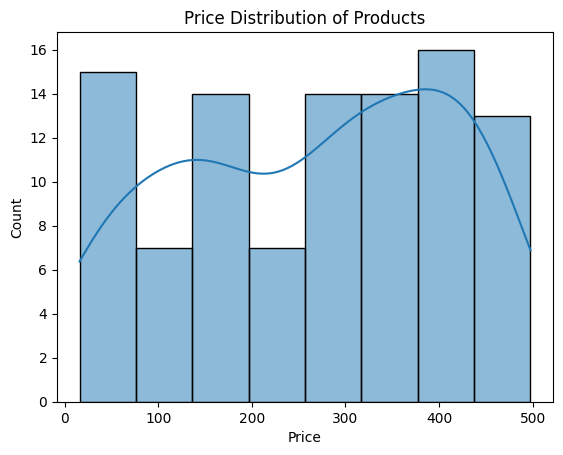

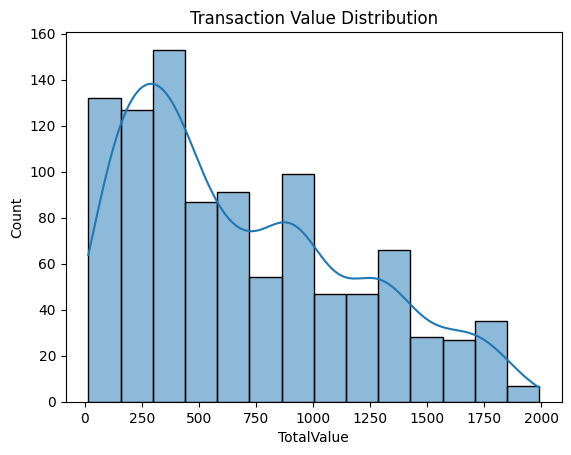

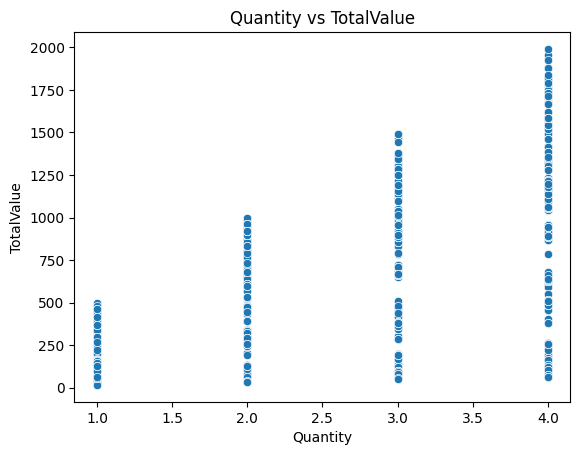

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing product price distribution
sns.histplot(products['Price'], kde=True)
plt.title('Price Distribution of Products')
plt.show()

# Visualizing transaction values distribution
sns.histplot(transactions['TotalValue'], kde=True)
plt.title('Transaction Value Distribution')
plt.show()

# Scatter plot for Quantity vs TotalValue (to check if high quantity correlates to high transaction value)
sns.scatterplot(data=transactions, x='Quantity', y='TotalValue')
plt.title('Quantity vs TotalValue')
plt.show()


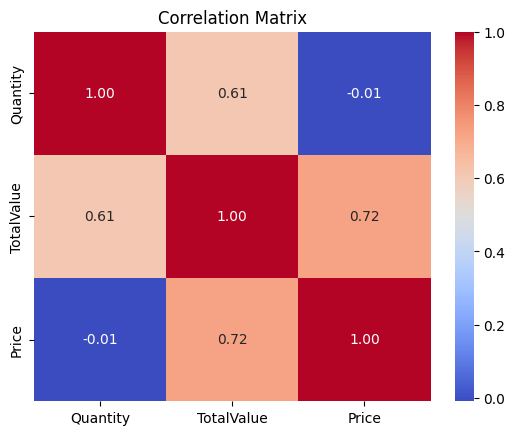

In [16]:
# Correlation matrix for numerical features
correlation_matrix = transactions[['Quantity', 'TotalValue', 'Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Merge customer data with transaction data
transactions_with_customers = pd.merge(transactions, customers, on='CustomerID', how='left')

# Aggregate transaction data by customer (total spending, total quantity purchased, etc.)
customer_summary = transactions_with_customers.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum'),
    avg_spent_per_purchase=('TotalValue', 'mean'),
    num_purchases=('TransactionID', 'nunique'),
).reset_index()

# Merge with customer demographic data
customer_summary = pd.merge(customer_summary, customers[['CustomerID', 'Region']], on='CustomerID', how='left')


In [19]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.1 MB 2.7 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.1 MB 2.7 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.1 MB 2.5 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.1 MB 2.4 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.1 MB 2.6 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 2.8 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.1 MB 2.7 MB/s eta 0:00:03
   ------------------- -------------------- 5.5/11.1 MB 2.7 MB/s eta 0:00:03
   ----------------------- ---------------- 6.6/11.1 MB 2.9 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 3.0 MB/s eta 0:00:02
   ----------

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample customer summary DataFrame (replace with actual data)
# customer_summary = pd.read_csv("customer_summary.csv")  # Replace with your actual DataFrame

# Select features for similarity calculation
similarity_features = customer_summary[['total_spent', 'total_quantity', 'avg_spent_per_purchase', 'num_purchases']]

# Normalize the features
scaler = StandardScaler()
similarity_features_scaled = scaler.fit_transform(similarity_features)

# Calculate cosine similarity
cosine_sim = cosine_similarity(similarity_features_scaled)

# Convert cosine similarity to DataFrame for better visualization
similarity_df = pd.DataFrame(cosine_sim, index=customer_summary['CustomerID'], columns=customer_summary['CustomerID'])

# For each customer (C0001 - C0020), find the top 3 lookalikes
lookalike_results = {}

# Loop through first 20 customers
for customer_id in customer_summary['CustomerID'].head(20):
    similar_customers = similarity_df[customer_id].nlargest(4).iloc[1:]  # Exclude the customer itself
    lookalike_results[customer_id] = [(x[0], x[1]) for x in zip(similar_customers.index, similar_customers.values)]

# Flatten the lookalike results into a list of tuples for DataFrame
flattened_results = []
for customer_id, lookalikes in lookalike_results.items():
    for lookalike in lookalikes:
        flattened_results.append([customer_id, lookalike[0], lookalike[1]])

# Create the DataFrame for lookalike results
lookalike_df = pd.DataFrame(flattened_results, columns=['CustomerID', 'LookalikeCustomerID', 'SimilarityScore'])

# Preview the first few rows of lookalike results
print(lookalike_df.head())  # To see the first few lookalike results

# Save the results to a CSV file
lookalike_df.to_csv('Lookalike.csv', index=False)



  CustomerID LookalikeCustomerID  SimilarityScore
0      C0001               C0164         0.996031
1      C0001               C0103         0.981548
2      C0001               C0069         0.963423
3      C0002               C0029         0.999525
4      C0002               C0031         0.997756


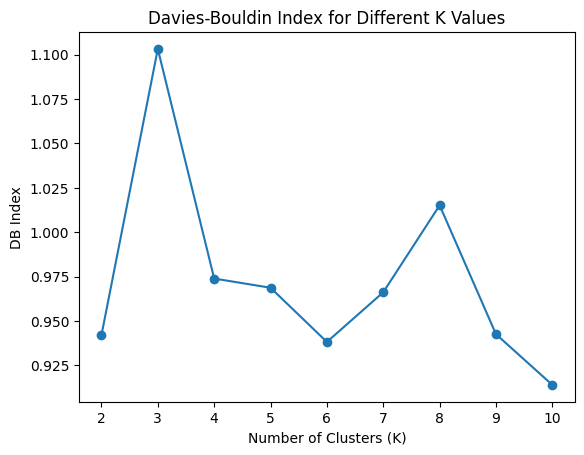

Optimal number of clusters: 10
Davies-Bouldin Index: 0.9139745364618437


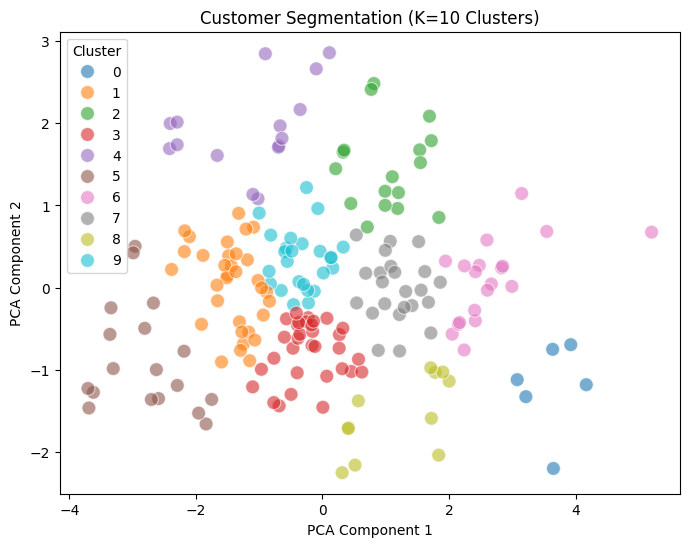

In [26]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preprocessing

# Merge customer and transaction data
transactions_with_customers = pd.merge(transactions, customers, on='CustomerID', how='left')

# Aggregate transaction data by customer
customer_summary = transactions_with_customers.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum'),
    avg_spent_per_purchase=('TotalValue', 'mean'),
    num_purchases=('TransactionID', 'nunique'),
).reset_index()

# Merge with customer demographic data
customer_summary = pd.merge(customer_summary, customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Select the features for clustering (we can include profile data and transaction data)
features = customer_summary[['total_spent', 'total_quantity', 'avg_spent_per_purchase', 'num_purchases']]

# Step 2: Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Finding the optimal number of clusters using DB Index and Elbow Method

# List to store DB Index for different cluster sizes
db_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    db_index = davies_bouldin_score(features_scaled, kmeans.labels_)
    db_scores.append(db_index)

# Plot DB Index for different values of k to choose the optimal number of clusters
plt.plot(k_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('DB Index')
plt.show()

# From the DB index plot, choose the k that gives the lowest DB index (good clustering)
optimal_k = k_range[np.argmin(db_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Step 4: Apply K-Means Clustering with the optimal number of clusters

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(features_scaled)

# Step 5: Evaluate Clustering with Metrics
db_index = davies_bouldin_score(features_scaled, customer_summary['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Optionally, evaluate with other metrics like Silhouette Score or Inertia
# from sklearn.metrics import silhouette_score
# silhouette = silhouette_score(features_scaled, customer_summary['Cluster'])
# print(f"Silhouette Score: {silhouette}")

# Step 6: Visualize the clusters
# 2D visualization using PCA (Principal Component Analysis) for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=customer_summary['Cluster'], palette='tab10', s=100, alpha=0.6)
plt.title(f'Customer Segmentation (K={optimal_k} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 7: Output the clustering results
# Saving the clustering results to a CSV file
customer_summary.to_csv('customer_segmentation_results.csv', index=False)


